In [8]:
import tensorflow as tf
import os
import shutil
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings("ignore")
#%matplotlib notebook
#nltk.download('stopwords')
#nltk.download('wordnet')
#! ls /home/muody/data/medicalnotes/dataset/train-data/Gastroenterology
#! file -i /home/muody/data/medicalnotes/dataset/train-data/Gastroenterology/*.txt


def np_to_pandas(data):
    text_l = []
    label_l = []
    for row in range(len(data)):
        try:
            text_l.append(data[row][0][0].decode('us-ascii'))
            label_l.append(data[row][1][0])
        except:
            continue
    return pd.DataFrame(zip(text_l, label_l), columns=['text', 'label'])


def clean_text(text, remove_stopwords=True):
    '''Text Preprocessing '''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', '', text)
    text = re.sub(r'<br />', '', text)
    text = re.sub(r'\'', '', text)
    text = re.sub(r'<b>', '', text)
    
    # remove stopwords
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    # Tokenize each word
    text =  nltk.WordPunctTokenizer().tokenize(text)
    
    return text


def lemmatized_words(df):
    lemm = nltk.stem.WordNetLemmatizer()
    df['lemmatized_text'] = list(map(lambda word:
                                     list(map(lemm.lemmatize, word)),
                                     df['text_cleaned']))


def main():
    directory = '/home/muody/data/medicalnotes/dataset/train-data/'
    data = tf.keras.preprocessing.text_dataset_from_directory(
        directory, 
        batch_size=1, 
        seed=42)
    data = np.stack(list(data))
    df = np_to_pandas(data)
    df['text_cleaned'] = list(map(clean_text, df.text))
    lemmatized_words(df)

    df['label'] = df['label'] == 1

    count = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3, 3], lowercase=False)
    X = count.fit_transform(df['text_cleaned'])
    y = df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42)
    feature_names = count.get_feature_names()
    count.vocabulary_

    model = LogisticRegression(C=1.0).fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print('Test Score with', score)
    results = dict(zip(count.get_feature_names(), model.coef_[0]))
    #print(pd.DataFrame(results).sort_values(by=1, ascending=False).head(10))
    max_value = max(results.items(), key=operator.itemgetter(1))[1]
    min_value = min(results.items(), key=operator.itemgetter(1))[1]
    print(max_value, min_value)
    print(data.take(1))

main()

Found 826 files belonging to 5 classes.
Test Score with 0.7868852459016393
0.19975448755881126 -0.33855879633225044
1


In [10]:
data = tf.keras.preprocessing.text_dataset_from_directory(
    directory, 
    batch_size=1, 
    seed=42)
data = np.stack(list(data))
df = np_to_pandas(data)
df['text_cleaned'] = list(map(clean_text, df.text))
lemmatized_words(df)

Found 826 files belonging to 5 classes.


In [11]:
input_string = df['text'].sample(1).values[0].strip()
input_string

"<B>CONFORMAL SIMULATION WITH COPLANAR BEAMS</B>\n\nThis patient is undergoing a conformal simulation as the method to precisely define the area of disease which needs to be treated.  It allows us to highly focus the beam of radiation and shape the beam to the target volume, delivering a homogenous dosage through it while sparing the surrounding, more radiosensitive, normal tissues.  This will allow us to give the optimum chance of tumor control while minimizing the acute and long-term side effects.\n\nA conformal simulation is a simulation which involves extended physician, therapist, and dosimetrist time and effort.  The patient is initially taken into a conventional simulator room, where appropriate markers are placed, and the patient is positioned and immobilized.  One then approximates the field sizes and arrangements (gantry angles, collimator angles, and number of fields).  Radiographs are taken, and these fields are marked on the patient's skin.  The patient is then transferred

In [12]:
from colorama import Fore, Back, Style
print(Fore.RED + 'some red text' + Style.RESET_ALL + ' and ')
print(Back.GREEN + 'and with a green background')
print(Style.DIM + 'and in dim text')
print(Style.RESET_ALL)
print('back to normal now')

some red text and 
and with a green background
and in dim text

back to normal now


In [354]:
pd.set_option('max_colwidth', 500)
df[['text', 'label', 'text_cleaned', 'lemmatized_text']].sample(3)

,text,label,text_cleaned,lemmatized_text
242,"\n\n\n\n\n<B>EXAM: </B> CT scan of the abdomen and pelvis with contrast.\n\n<B>REASON FOR EXAM: </B> Abdominal pain.\n\n<B>COMPARISON EXAM: </B> None.\n\n<B>TECHNIQUE: </B> Multiple axial images of the abdomen and pelvis were obtained. 5-mm slices were acquired after injection of 125 cc of Omnipaque IV. In addition, oral ReadiCAT was given. Reformatted sagittal and coronal images were obtained.\n\n<B>DISCUSSION:</B> There are numerous subcentimeter nodules seen within the lung bases. Th...",False,"[exam, ct, scan, abdomen, pelvis, contrast, reason, exam, abdominal, pain, comparison, exam, none, technique, multiple, axial, images, abdomen, pelvis, obtained, 5mm, slices, acquired, injection, 125, cc, omnipaque, iv, addition, oral, readicat, given, reformatted, sagittal, coronal, images, obtained, discussion, numerous, subcentimeter, nodules, seen, within, lung, bases, largest, measures, 6, mm, hiatal, hernia, identified, consider, chest, ct, evaluation, pulmonary, nodules, liver, gallbl...","[exam, ct, scan, abdomen, pelvis, contrast, reason, exam, abdominal, pain, comparison, exam, none, technique, multiple, axial, image, abdomen, pelvis, obtained, 5mm, slice, acquired, injection, 125, cc, omnipaque, iv, addition, oral, readicat, given, reformatted, sagittal, coronal, image, obtained, discussion, numerous, subcentimeter, nodule, seen, within, lung, base, largest, measure, 6, mm, hiatal, hernia, identified, consider, chest, ct, evaluation, pulmonary, nodule, liver, gallbladder, ..."
116,"\n\n\n\n\n<B>CC:</B> Weakness.\n\n<B>HX:</B> This 30 y/o RHM was in good health until 7/93, when he began experiencing RUE weakness and neck pain. He was initially treated by a chiropractor and, after an unspecified length of time, developed atrophy and contractures of his right hand. He then went to a local neurosurgeon and a cervical spine CT scan, 9/25/92, revealed an intramedullary lesion at C2-3 and an extramedullary lesion at C6-7. He underwent a C6-T1 laminectomy with exploration and ...",False,"[cc, weakness, hx, 30, yo, rhm, good, health, 793, began, experiencing, rue, weakness, neck, pain, initially, treated, chiropractor, unspecified, length, time, developed, atrophy, contractures, right, hand, went, local, neurosurgeon, cervical, spine, ct, scan, 92592, revealed, intramedullary, lesion, c23, extramedullary, lesion, c67, underwent, c6t1, laminectomy, exploration, decompression, spinal, cord, clinical, condition, improved, 3, month, postoperative, period, progressively, worsened,...","[cc, weakness, hx, 30, yo, rhm, good, health, 793, began, experiencing, rue, weakness, neck, pain, initially, treated, chiropractor, unspecified, length, time, developed, atrophy, contracture, right, hand, went, local, neurosurgeon, cervical, spine, ct, scan, 92592, revealed, intramedullary, lesion, c23, extramedullary, lesion, c67, underwent, c6t1, laminectomy, exploration, decompression, spinal, cord, clinical, condition, improved, 3, month, postoperative, period, progressively, worsened, ..."
97,"\n\n\n\n\n<B>HISTORY OF PRESENT ILLNESS: </B> The patient is a 62-year old male with a Gleason score 8 adenocarcinoma of the prostate involving the left and right lobes. He has a PSA of 3.1, with a prostate gland size of 41 grams. This was initially found on rectal examination with a nodule on the right side of the prostate, showing enlargement relative to the left. He has undergone evaluation with a bone scan that showed a right parietal lesion uptake and was seen by Dr. XXX and ultimate...",False,"[history, present, illness, patient, 62year, old, male, gleason, score, 8, adenocarcinoma, prostate, involving, left, right, lobes, psa, 31, prostate, gland, size, 41, grams, initially, found, rectal, examination, nodule, right, side, prostate, showing, enlargement, relative, left, undergone, evaluation, bone, scan, showed, right, parietal, lesion, uptake, seen, dr, xxx, ultimately, underwent, open, biopsy, malignant, p

In [329]:
bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = bow_converter.fit_transform(df['text_cleaned'])
words = bow_converter.get_feature_names()

In [330]:
bigram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[2,2], lowercase=False) 
x2 = bigram_converter.fit_transform(df['text_cleaned'])
bigrams = bigram_converter.get_feature_names()

In [331]:
trigram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False) 
x3 = trigram_converter.fit_transform(df['text_cleaned'])
trigrams = trigram_converter.get_feature_names()

In [332]:
print(len(words), len(bigrams), len(trigrams))

14282 105193 141492


<IPython.core.display.Javascript object>


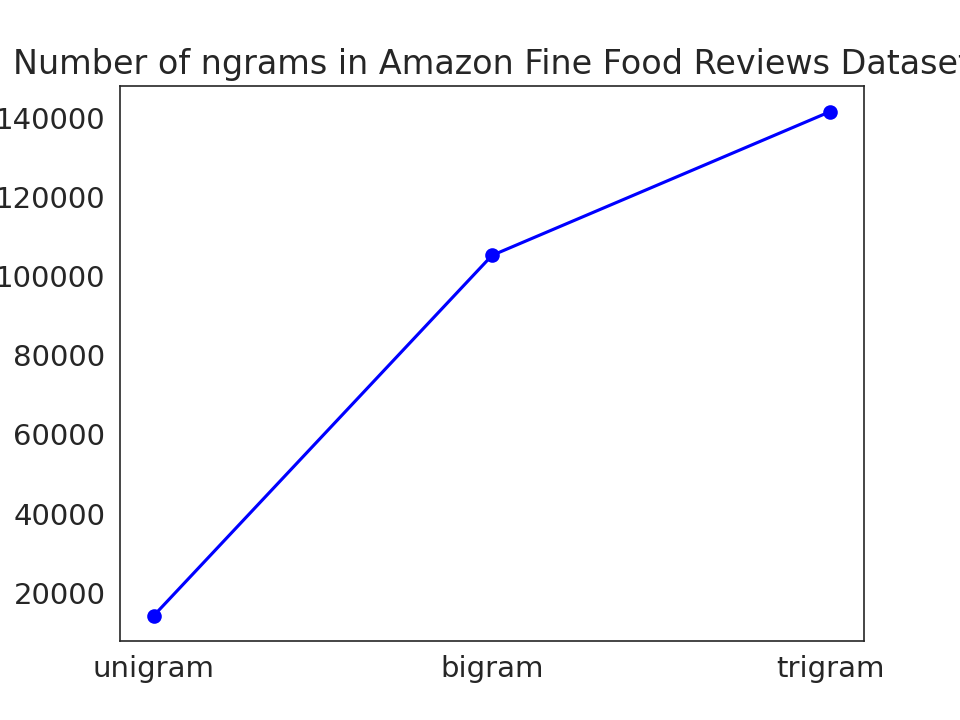

In [333]:
sns.set_style("white")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='blue')
plt.plot(counts, 'bo')
#plt.margins(0.1)
plt.ticklabel_format(style = 'plain')
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in Amazon Fine Food Reviews Dataset', {'fontsize':16})
plt.show()

In [335]:
count.vocabulary_

{'preoperative diagnosis squamous': 98658,
 'diagnosis squamous cell': 36798,
 'squamous cell carcinoma': 119429,
 'cell carcinoma right': 25071,
 'carcinoma right temporal': 23695,
 'right temporal bonemiddle': 109697,
 'temporal bonemiddle ear': 125912,
 'bonemiddle ear space': 21147,
 'ear space postoperative': 42030,
 'space postoperative diagnosis': 118386,
 'postoperative diagnosis squamous': 98109,
 'ear space procedure': 42031,
 'space procedure right': 118387,
 'procedure right temporal': 100607,
 'right temporal bone': 109696,
 'temporal bone resection': 125910,
 'bone resection rectus': 21074,
 'resection rectus abdominis': 107301,
 'rectus abdominis myocutaneous': 104823,
 'abdominis myocutaneous free': 8001,
 'myocutaneous free flap': 81092,
 'free flap reconstruction': 52964,
 'flap reconstruction skull': 50756,
 'reconstruction skull base': 104576,
 'skull base defect': 117108,
 'base defect right': 18124,
 'defect right selective': 34751,
 'right selective neck': 109576

In [336]:
def simple_logistic_classify(X_train, y_train, X_test, y_test, description, _C=1.0):
    model = LogisticRegression(C=_C).fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    return model

model = simple_logistic_classify(X_train, y_train, X_test, y_test, 'bow')
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
grid_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
pd.DataFrame(zip(count.get_feature_names(), model.coef_[0])).sort_values(by=1, ascending=False).head(10)

Test Score with bow features 0.7743589743589744


,0,1
114452,sharp wave activity,0.239536
110841,rule temporal arteritis,0.194245
45391,evidence acute intracranial,0.140711
9280,acute intracranial hemorrhage,0.140711
137495,wave activity seen,0.139659
45776,exam ct head,0.130952
94011,person place time,0.129842
33363,cyclesecond bilaterally little,0.126051
16017,artifacts noted throughout,0.126051
106889,report electroencephalogram shows,0.126051


In [319]:
X_train_tfidf = tfidf_transform.fit_transform(X_train)
X_test_tfidf = tfidf_transform.fit_transform(X_test)
model = simple_logistic_classify(X_train_tfidf, y_train, X_test_tfidf, y_test, 'tf-idf')
grid_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
pd.DataFrame(zip(count.get_feature_names(), model.coef_[0])).sort_values(by=1, ascending=False).head(10)

Test Score with tf-idf features 0.7743589743589744


,0,1
114452,sharp wave activity,0.044450
110841,rule temporal arteritis,0.037597
137495,wave activity seen,0.027706
42938,electroencephalogram shows background,0.026244
72072,little activity beta,0.026244
33363,cyclesecond bilaterally little,0.026244
5751,47 cyclesecond low,0.026244
33364,cyclesecond low amplitude,0.026244
121021,stimulation reveals important,0.026244
127659,throughout tracing hyperventilation,0.026244
